In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def tanner_graph(interaction_range, nq, filename = None):
    r"""
    Generates a graph to showcase interactions
    Inputs :
    interaction_range : list of tuples 
    nq : Total number of qubits
    filename : graph stored into the filename specified
    Example inputs : interaction_range = [(1,2,3),(0,3),(4,6),(2,3,5,7),(6,)]
    nq = 7    
    """
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    nmaps = len(interaction_range)
    lateral_shift_maps = 0
    lateral_shift_qubits = 0
    if(nmaps > nq):
        lateral_shift_qubits += (nmaps-nq)/2
    else:
        lateral_shift_maps += (nq-nmaps)/2
        
    xmaps = [ lateral_shift_maps+i for i in range(nmaps)]
    ymaps = [0.4 for __ in range(nmaps)]
    for i in range(nmaps):
        plt.annotate("$\mathcal{E}_{%s}$" %(str(i+1)),(xmaps[i] - 0.15, ymaps[i] + 0.04),fontsize = 14)
        
    xqubits = [ lateral_shift_qubits + i for i in range(nq)]
    yqubits = [0 for __ in range(nq)]
    for i in range(nq):
        plt.annotate("$q_{%s}$" %(str(i+1)),(xqubits[i] - 0.15, yqubits[i] - 0.05), fontsize = 14)
        
    plt.plot(xmaps, ymaps, linestyle = "", marker = "s", markersize = 15)
    plt.plot(xqubits, yqubits, linestyle = "", marker = "o",  markersize = 15)
    
    for map_number in range(nmaps):
        for q in interaction_range[map_number]:
            plt.plot([xmaps[map_number], xqubits[q]],[ymaps[map_number]-0.02, yqubits[q]+0.02], color = colors[map_number%len(colors)])
            
    bottom, top = plt.ylim()
    plt.ylim(bottom - 0.05,top + 0.05)
    plt.axis('off')
    if filename is None:
        filename = "tanner.pdf"
    plt.savefig(filename, dpi=100, quality=100)
    plt.show()
    

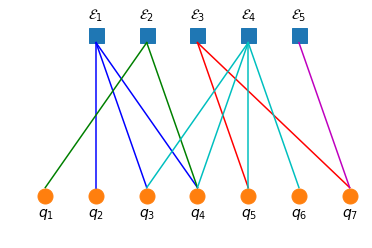

In [7]:
interaction_range = [(1,2,3),(0,3),(4,6),(2,3,5,4),(6,)]
nq = 7
tanner_graph(interaction_range,nq)